In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**그래프 빌딩 -> 그래프 실행**

In [2]:
a = tf.add(3,5)
print(a)
# tf.Session() = thread
# eager mode 킬시 run 생략가능
sess = tf.Session()
print(sess.run(a))
sess.close()

Tensor("Add:0", shape=(), dtype=int32)
8


In [3]:
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
useless = tf.multiply(x, op1)
op3 = tf.pow(op2,op1)
# 세션을 여는것과 닫는것을 동시에 해주는 with문
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)
    op2, useless = sess.run([op2, useless])
    print(op2, useless)

7776
6 10


### 히든레이어 없는 간단한 선형 회귀 구현

Instructions for updating:
Colocations handled automatically by placer.
epoch 0: w [0.58164847] b [1.0045403]
loss 358.6353454589844

epoch 5000: w [-0.7682163] b [31.52517]
loss 40.6955680847168

[-0.9336123] [34.280064]


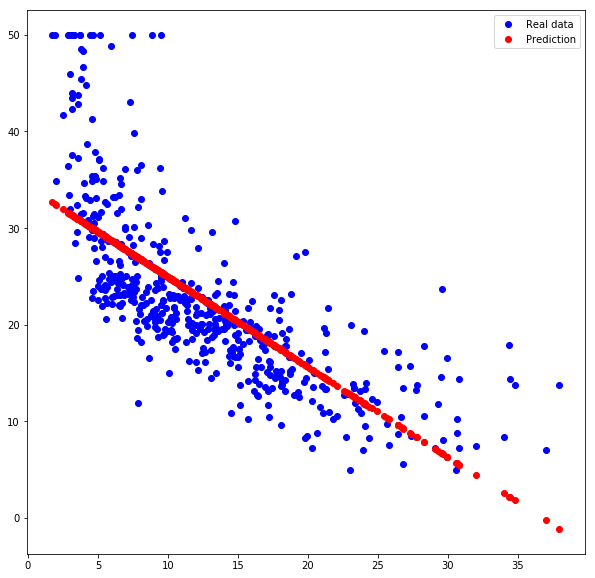

In [4]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

w = tf.Variable(tf.random_normal([1])) # 가중치
b = tf.Variable(tf.random_normal([1])) # bias
model = w * x_data + b 

loss = tf.reduce_mean(tf.square(model - y_data)) # 손실함수
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss) # 손실함수 넣고 최소화

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(10000):
        sess.run(train) # 앞서 설정한 학습 진행 코드
        if epoch % 5000 == 0:
            print(f'epoch {epoch}: w {sess.run(w)} b {sess.run(b)}')
            print(f'loss {sess.run(loss)}')
            print()
            
    w_out, b_out = sess.run([w,b])
    print(sess.run(w),sess.run(b))

plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data,x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

### 히든 레이어 1개

epoch 0: loss 633.391412959494

epoch 25000: loss 84.46087744950995



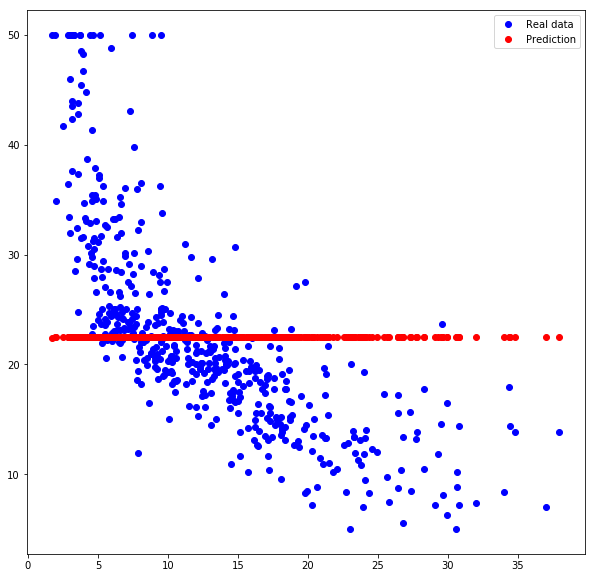

In [5]:
# input data(x_data) shape = [506 , 1]
# output data (y_data) shape = [506, 1]
# [506,] > [506, 1]
x_d = tf.reshape(x_data, [len(x_data), 1])
y_d = tf.reshape(y_data, [len(y_data), 1])
# 가중치 초기화 
# [506,1] *(1,5) > [506,5] *(5,1) > [506,1]
# (1,5)는 가중치고 (5,1)도 가중치다 마지막에 나와야하는 값이 1이니 마지막값이 1이다.
W = tf.Variable(tf.random_normal([1,5], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([5,1],dtype=tf.float64))

hidden = tf.nn.sigmoid(tf.matmul(x_d,W))
output = tf.matmul(hidden, W_out)

# output : 학습한 결과 y_d : 정답 데이터
# 두개의 데이터의 차이를 제곱해서 평균낸것이  
loss = tf.reduce_mean(tf.square(output-y_d))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train =optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(50000):
        sess.run(train) # 앞서 설정한 학습 진행 코드
        if epoch % 25000 == 0:
            print(f'epoch {epoch}: loss {sess.run(loss)}')
            print()
            
    output = sess.run(output)

plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()

### 히든레이어 2개 + AdamOptimizer + relu

epoch 0: loss 417.6278066720843

epoch 25000: loss 27.0701631859612



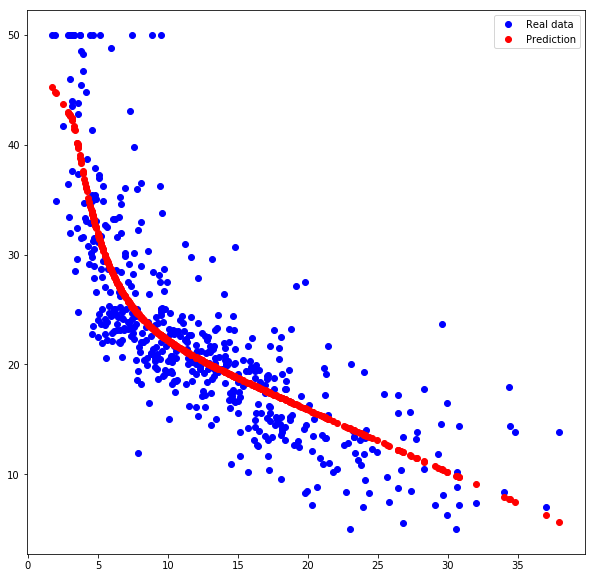

In [7]:
x_d = tf.reshape(x_data, [len(x_data), 1])
y_d = tf.reshape(y_data, [len(y_data), 1])

W = tf.Variable(tf.random_normal([1,5], dtype=tf.float64))
W1 = tf.Variable(tf.random_normal([5,10],dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10,1],dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(x_d,W))
hidden2 = tf.nn.elu(tf.matmul(hidden1,W1))
output = tf.matmul(hidden2, W_out)

loss = tf.reduce_mean(tf.square(output-y_d))
optimizer = tf.train.AdamOptimizer(0.001)
train =optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(50000):
        sess.run(train) # 앞서 설정한 학습 진행 코드
        if epoch % 25000 == 0:
            print(f'epoch {epoch}: loss {sess.run(loss)}')
            print()
            
    output = sess.run(output)

plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label='Real data')
plt.plot(x_data, output, 'ro', label='Prediction')
plt.legend()
plt.show()